In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\tools\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import missingno as msno
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [71]:
from sklearn.metrics      import roc_auc_score

In [3]:
os. getcwd()

'C:\\Users\\ffan1\\OneDrive - IESEG (1)\\Statistical and Machine Learning\\Group Project\\MBD2021-Bank-Telemarketing-Outcome-Prediction\\notebooks'

In [4]:
df_train = pd.read_csv("../data/bank_mkt_train.csv")

In [5]:
df_train.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42.0,management,married,basic.9y,no,no,no,cellular,jul,...,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35.0,unemployed,married,university.degree,no,yes,no,telephone,jun,...,4.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44.0,technician,married,basic.9y,no,yes,yes,cellular,may,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
3,9642,45.0,services,married,high.school,no,yes,no,cellular,apr,...,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
4,14183,45.0,unknown,married,unknown,unknown,unknown,unknown,telephone,may,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [6]:
df_test = pd.read_csv("../data/bank_mkt_test.csv")

In [7]:
df_test.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2986,53.0,technician,single,professional.course,no,no,no,cellular,jul,tue,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
1,29710,32.0,blue-collar,married,basic.6y,no,yes,no,telephone,jul,wed,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
2,38938,70.0,retired,married,high.school,no,yes,no,cellular,aug,tue,1.0,999.0,0.0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2
3,31313,46.0,services,married,high.school,no,no,no,cellular,apr,mon,1.0,999.0,1.0,failure,-1.8,93.075,-47.1,1.405,5099.1
4,24173,35.0,technician,single,unknown,no,no,no,cellular,may,thu,1.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       20000 non-null  int64  
 1   age             19798 non-null  float64
 2   job             19839 non-null  object 
 3   marital         19801 non-null  object 
 4   education       19830 non-null  object 
 5   default         19786 non-null  object 
 6   housing         19805 non-null  object 
 7   loan            19781 non-null  object 
 8   contact         19783 non-null  object 
 9   month           19801 non-null  object 
 10  day_of_week     19815 non-null  object 
 11  campaign        19797 non-null  float64
 12  pdays           19815 non-null  float64
 13  previous        19791 non-null  float64
 14  poutcome        19825 non-null  object 
 15  emp.var.rate    19835 non-null  float64
 16  cons.price.idx  19819 non-null  float64
 17  cons.conf.idx   19803 non-null 

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       10000 non-null  int64  
 1   age             9895 non-null   float64
 2   job             9889 non-null   object 
 3   marital         9905 non-null   object 
 4   education       9903 non-null   object 
 5   default         9876 non-null   object 
 6   housing         9897 non-null   object 
 7   loan            9891 non-null   object 
 8   contact         9913 non-null   object 
 9   month           9880 non-null   object 
 10  day_of_week     9894 non-null   object 
 11  campaign        9912 non-null   float64
 12  pdays           9900 non-null   float64
 13  previous        9895 non-null   float64
 14  poutcome        9895 non-null   object 
 15  emp.var.rate    9895 non-null   float64
 16  cons.price.idx  9899 non-null   float64
 17  cons.conf.idx   9896 non-null   

<AxesSubplot:>

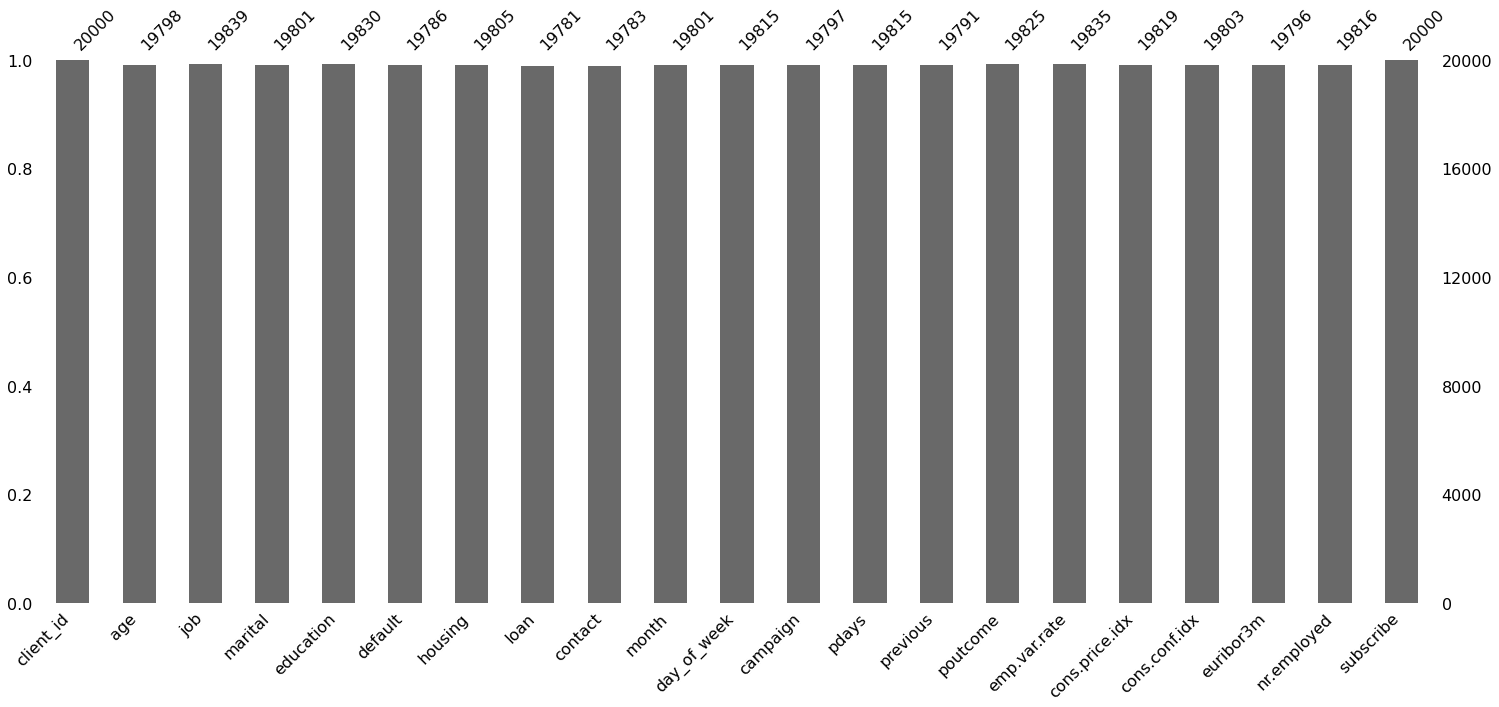

In [10]:
msno.bar(df_train)

<AxesSubplot:>

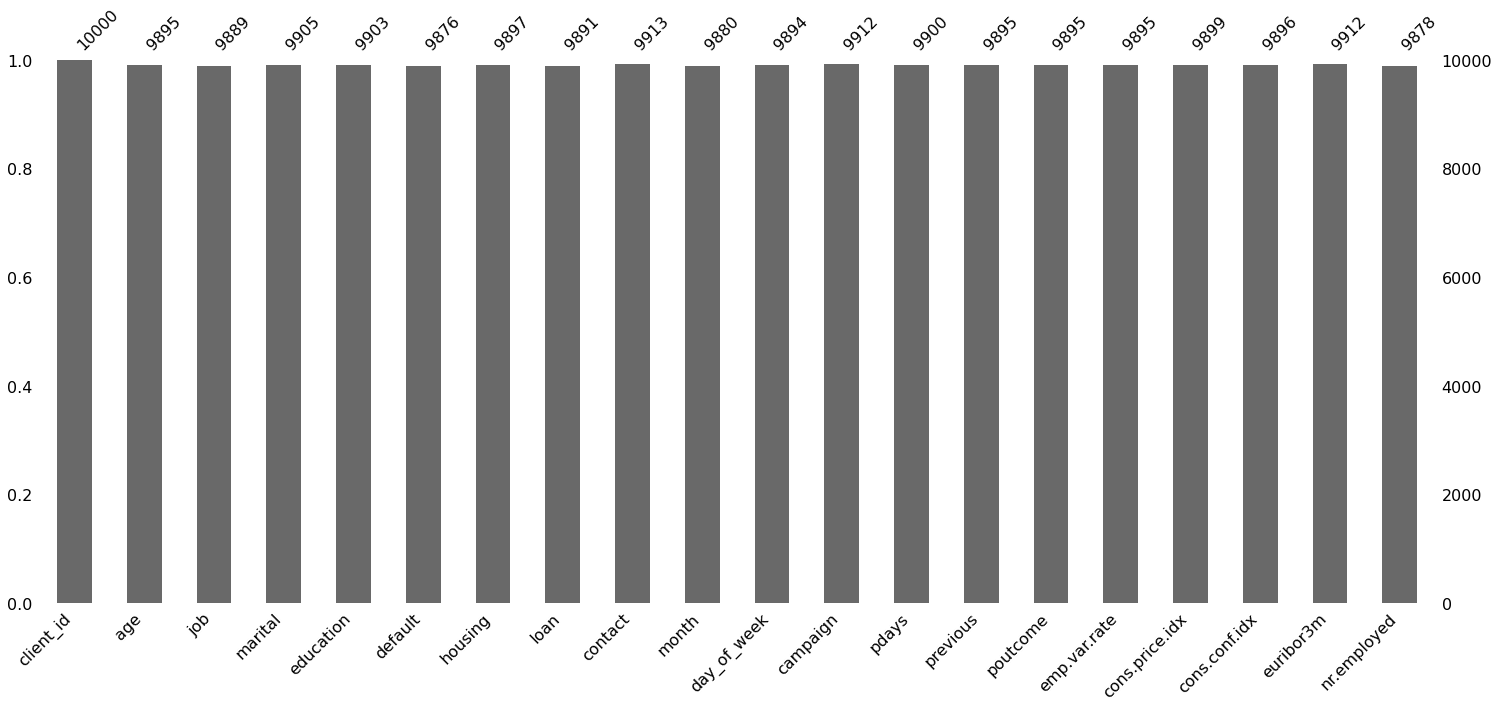

In [11]:
msno.bar(df_test)

## Examine Feature Importance

In [12]:
df_train.columns

Index(['client_id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribe'],
      dtype='object')

In [13]:
df_train.dtypes

client_id           int64
age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribe           int64
dtype: object

In [14]:
cat_cols = []
numeric_cols = []

for col in df_train.columns:
    if df_train[col].dtype == 'object':
        cat_cols.append(col)
    else:
        numeric_cols.append(col)

In [15]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [16]:
numeric_cols

['client_id',
 'age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'subscribe']

In [17]:
#check correlations for numeric cols

df_numeric = df_train[numeric_cols]

In [18]:
df_numeric.drop("subscribe", axis=1).apply(lambda x: x.corr(df_numeric.subscribe))

client_id        -0.003702
age               0.035057
campaign         -0.064095
pdays            -0.333984
previous          0.236791
emp.var.rate     -0.299722
cons.price.idx   -0.138401
cons.conf.idx     0.055850
euribor3m        -0.309708
nr.employed      -0.355696
dtype: float64

In [19]:
df_cat_nums = pd.DataFrame({'job':df_train['job'], 'marital':df_train['marital'],  'education':df_train['education'],'default':df_train['default'],'housing':df_train['housing'],'loan':df_train['loan'],'contact':df_train['contact'],'month':df_train['month'],'day_of_week':df_train['day_of_week'],'poutcome':df_train['poutcome']})

In [20]:
def cat_to_num(df,cols):
    """iterates over list of cols
       transforming each col within 
       a dataframe of only categorical columns
       to a numerical value
       args: a dataframe with only categorical features 
       and a list of col names
       output: the df given as input is returned
       with the numerical transformations of each categorical
    """
    for col in cols:
        df[col] = df[col].astype('category').cat.codes
    return(df)

In [21]:
df_cat_nums = cat_to_num(df_cat_nums,cat_cols)

In [22]:
df_cat_nums.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,4,1,2,0,0,0,0,3,2,1
1,10,1,6,0,2,0,1,4,1,1
2,9,1,2,0,2,2,0,6,1,1
3,7,1,3,0,2,0,0,0,3,1
4,11,1,7,1,1,1,1,6,4,1


In [23]:
df_train_nums_only = df_train.drop(columns=cat_cols,axis=1)

In [24]:
df_train_nums_only.head()

,client_id,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42.0,1.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35.0,4.0,999.0,0.0,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44.0,1.0,999.0,0.0,-1.8,92.893,-46.2,1.264,5099.1,0
3,9642,45.0,1.0,999.0,0.0,-1.8,93.075,-47.1,1.453,5099.1,0
4,14183,45.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,0


In [25]:
df_train_nums_only = pd.concat([df_train_nums_only,df_cat_nums],axis=1)

In [26]:
len(df_train_nums_only)

20000

In [27]:
df_train_nums_only.dropna(inplace=True,axis=0)

In [28]:
len(df_train_nums_only)

18341

In [29]:
# categorical feature correlations with target
df_train_nums_only.drop(columns='subscribe', axis=1).apply(lambda x: x.corr(df_train_nums_only.subscribe))


client_id        -0.003772
age               0.038127
campaign         -0.064363
pdays            -0.330668
previous          0.230227
emp.var.rate     -0.300298
cons.price.idx   -0.138461
cons.conf.idx     0.050438
euribor3m        -0.309566
nr.employed      -0.354601
job               0.029556
marital           0.041034
education         0.055779
default          -0.098306
housing           0.006242
loan              0.001610
contact          -0.134892
month             0.004651
day_of_week       0.009498
poutcome          0.127354
dtype: float64

In [30]:
df_train_nums_only.columns

Index(['client_id', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'subscribe', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [31]:
X = df_train_nums_only[['client_id', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
y = df_train_nums_only.subscribe

In [32]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [33]:
clf = RandomForestClassifier(max_depth=5, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [34]:
preds = clf.predict(X_test)

In [35]:
accuracy_score(y_test, preds)

0.9013355137639684

### preprocessing for entire train and test sets

In [36]:
#transforming categoricals for the train set 
df_train = cat_to_num(df_train,cat_cols)

In [37]:
df_train.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42.0,4,1,2,0,0,0,0,3,...,1.0,999.0,0.0,1,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35.0,10,1,6,0,2,0,1,4,...,4.0,999.0,0.0,1,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44.0,9,1,2,0,2,2,0,6,...,1.0,999.0,0.0,1,-1.8,92.893,-46.2,1.264,5099.1,0
3,9642,45.0,7,1,3,0,2,0,0,0,...,1.0,999.0,0.0,1,-1.8,93.075,-47.1,1.453,5099.1,0
4,14183,45.0,11,1,7,1,1,1,1,6,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.859,5191.0,0


In [38]:
#transforming categoricals for the test set 
df_test = cat_to_num(df_test,cat_cols)

In [39]:
df_test.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2986,53.0,9,2,5,0,0,0,0,3,3,1.0,999.0,0.0,1,1.4,93.918,-42.7,4.961,5228.1
1,29710,32.0,1,1,1,0,2,0,1,3,4,2.0,999.0,0.0,1,1.4,93.918,-42.7,4.963,5228.1
2,38938,70.0,5,1,3,0,2,0,0,1,3,1.0,999.0,0.0,1,-2.9,92.201,-31.4,0.883,5076.2
3,31313,46.0,7,1,3,0,0,0,0,0,1,1.0,999.0,1.0,0,-1.8,93.075,-47.1,1.405,5099.1
4,24173,35.0,9,2,7,0,0,0,0,6,2,1.0,999.0,1.0,0,-1.8,92.893,-46.2,1.266,5099.1


## Imputation

In [40]:
#trainset
# impute numerical columns using mean
#imputing age column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_train[['age']])
df_train['age'] = imp_numerical.transform(df_train[['age']])
#imputing pdays column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_train[['pdays']])
df_train['pdays'] = imp_numerical.transform(df_train[['pdays']])
#imputing campaign column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_train[['campaign']])
df_train['campaign'] = imp_numerical.transform(df_train[['campaign']])
#imputing campaign column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_train[['campaign']])
df_train['campaign'] = imp_numerical.transform(df_train[['campaign']])
#imputing previous column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_train[['previous']])
df_train['previous'] = imp_numerical.transform(df_train[['previous']])
#imputing poutcome column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_train[['poutcome']])
df_train['poutcome'] = imp_numerical.transform(df_train[['poutcome']])
#imputing emp.var.rate column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_train[['emp.var.rate']])
df_train['emp.var.rate'] = imp_numerical.transform(df_train[['emp.var.rate']])
#imputing cons.price.idx column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_train[['cons.price.idx']])
df_train['cons.price.idx'] = imp_numerical.transform(df_train[['cons.price.idx']])
#imputing cons.conf.idx  column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_train[['cons.conf.idx']])
df_train['cons.conf.idx'] = imp_numerical.transform(df_train[['cons.conf.idx']])
#imputing euribor3m column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_train[['euribor3m']])
df_train['euribor3m'] = imp_numerical.transform(df_train[['euribor3m']])
#imputing nr.employed column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_train[['nr.employed']])
df_train['nr.employed'] = imp_numerical.transform(df_train[['nr.employed']])


#impute categoricals 
#imputing jobs column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_train[['job']])
df_train['job'] = imp_numerical.transform(df_train[['job']])
#imputing marital column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_train[['marital']])
df_train['marital'] = imp_numerical.transform(df_train[['marital']])
#imputing education column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_train[['education']])
df_train['education'] = imp_numerical.transform(df_train[['education']])
#imputing default column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_train[['default']])
df_train['default'] = imp_numerical.transform(df_train[['default']])
#imputing housing column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_train[['housing']])
df_train['housing'] = imp_numerical.transform(df_train[['housing']])
#imputing loan column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_train[['loan']])
df_train['loan'] = imp_numerical.transform(df_train[['loan']])
#imputing month column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_train[['month']])
df_train['month'] = imp_numerical.transform(df_train[['month']])
#imputing day_of_week column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_train[['day_of_week']])
df_train['day_of_week'] = imp_numerical.transform(df_train[['day_of_week']])
#imputing poutcome column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_train[['poutcome']])
df_train['poutcome'] = imp_numerical.transform(df_train[['poutcome']])

#testset
# impute numerical columns using mean
#imputing age column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_test[['age']])
df_test['age'] = imp_numerical.transform(df_test[['age']])
#imputing pdays column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_test[['pdays']])
df_test['pdays'] = imp_numerical.transform(df_test[['pdays']])
#imputing campaign column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_test[['campaign']])
df_test['campaign'] = imp_numerical.transform(df_test[['campaign']])
#imputing campaign column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_test[['campaign']])
df_test['campaign'] = imp_numerical.transform(df_test[['campaign']])
#imputing previous column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_test[['previous']])
df_test['previous'] = imp_numerical.transform(df_test[['previous']])
#imputing poutcome column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_test[['poutcome']])
df_test['poutcome'] = imp_numerical.transform(df_test[['poutcome']])
#imputing emp.var.rate column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_test[['emp.var.rate']])
df_test['emp.var.rate'] = imp_numerical.transform(df_test[['emp.var.rate']])
#imputing cons.price.idx column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_test[['cons.price.idx']])
df_test['cons.price.idx'] = imp_numerical.transform(df_test[['cons.price.idx']])
#imputing cons.conf.idx  column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_test[['cons.conf.idx']])
df_test['cons.conf.idx'] = imp_numerical.transform(df_test[['cons.conf.idx']])
#imputing euribor3m column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_test[['euribor3m']])
df_test['euribor3m'] = imp_numerical.transform(df_test[['euribor3m']])
#imputing nr.employed column
imp_numerical = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer = imp_numerical.fit(df_test[['nr.employed']])
df_test['nr.employed'] = imp_numerical.transform(df_test[['nr.employed']])

#impute categoricals 
#imputing jobs column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_test[['job']])
df_test['job'] = imp_numerical.transform(df_test[['job']])
#imputing marital column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_test[['marital']])
df_test['marital'] = imp_numerical.transform(df_test[['marital']])
#imputing education column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_test[['education']])
df_test['education'] = imp_numerical.transform(df_test[['education']])
#imputing default column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_test[['default']])
df_test['default'] = imp_numerical.transform(df_test[['default']])
#imputing housing column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_test[['housing']])
df_test['housing'] = imp_numerical.transform(df_test[['housing']])
#imputing loan column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_test[['loan']])
df_test['loan'] = imp_numerical.transform(df_test[['loan']])
#imputing month column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_test[['month']])
df_test['month'] = imp_numerical.transform(df_test[['month']])
#imputing day_of_week column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_test[['day_of_week']])
df_test['day_of_week'] = imp_numerical.transform(df_test[['day_of_week']])
#imputing poutcome column
imp_categorical = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer = imp_categorical.fit(df_test[['poutcome']])
df_test['poutcome'] = imp_numerical.transform(df_test[['poutcome']])

C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- job
Feature names seen at fit time, yet now missing:
- nr.employed

  warnings.warn(message, FutureWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- marital
Feature names seen at fit time, yet now missing:
- nr.employed

  warnings.warn(message, FutureWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- education
Feature names seen at fit time, yet now missing:
- nr.employed

  warnings.warn(message, FutureWarning)


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       20000 non-null  int64  
 1   age             20000 non-null  float64
 2   job             20000 non-null  float64
 3   marital         20000 non-null  float64
 4   education       20000 non-null  float64
 5   default         20000 non-null  float64
 6   housing         20000 non-null  float64
 7   loan            20000 non-null  float64
 8   contact         20000 non-null  int8   
 9   month           20000 non-null  float64
 10  day_of_week     20000 non-null  float64
 11  campaign        20000 non-null  float64
 12  pdays           20000 non-null  float64
 13  previous        20000 non-null  float64
 14  poutcome        20000 non-null  float64
 15  emp.var.rate    20000 non-null  float64
 16  cons.price.idx  20000 non-null  float64
 17  cons.conf.idx   20000 non-null 

In [42]:
#subset train set for important cols based on correlation analysis 
df_train = df_train[['client_id', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome','subscribe']]

In [43]:
#test set as well - dv subscribe
df_test = df_test[['client_id', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome']]

In [44]:
#seperate feature matrix and target vector
X_train = df_train[['client_id', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
y_train = df_train.subscribe

In [45]:
#create X_test matrix 
#seperate feature matrix and target vector
X_test = df_test[['client_id', 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome']]


In [46]:
clf = RandomForestClassifier(max_depth=5, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [69]:
# preds1 = clf.predict(X_test)

In [47]:
rf_preds = clf.predict_proba(X_test)[:,1]

In [48]:
final_df = X_test.copy(deep=True)
final_df = X_test[['client_id']]
final_df['subscribe'] = rf_preds

<ipython-input-48-1241de483434>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['subscribe'] = rf_preds


In [49]:
final_df.to_csv('rf_submission2.csv',index=False)

In [61]:
from pprint import pprint

In [63]:
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [104]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [105]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8, 10],
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [113]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf1 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [114]:
clf_random.best_params_

{'n_estimators': 733,
 'min_samples_split': 20,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [115]:
best_random = clf_random.best_estimator_

In [116]:
rf_preds_bestrandom = best_random.predict_proba(X_test)[:,1]

In [117]:
final_df_bestr = X_test.copy(deep=True)
final_df_bestr = X_test[['client_id']]
final_df_bestr['subscribe'] = rf_preds_bestrandom

<ipython-input-117-a9818db9599f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_bestr['subscribe'] = rf_preds_bestrandom


In [118]:
final_df_bestr.to_csv('rf_submission8.csv',index=False)